# Draft analysis 

---

Student name: Priscila Strömsdörfer - ps178@hdm-stuttgart.de

---


## Introduction

**Motivation**

Die Sicherstellung der Lieferzuverlässigkeit in der Automobilindustrie ist entscheidend. Probleme mit Liefertermintreue können Produktionsprozesse stören und die Effizienz der Lieferkette beeinträchtigen. Mithilfe von datenbasierten Analysen sollen Schwachstellen identifiziert und Optimierungspotenziale aufgedeckt werden.

Ein typisches Beispiel: Ein wichtiger Lieferant für Radlager meldet einen Lieferverzug von drei Tagen aufgrund von logistischen Problemen. In der Zwischenzeit kann die Montage der Fahrzeuge nicht fortgesetzt werden, da die benötigten Teile fehlen. Dieser Stillstand verursacht nicht nur direkte Produktionskosten, sondern führt auch zu Verzögerungen bei der Auslieferung der Fahrzeuge an Kunden. In hochvernetzten Lieferketten können solche Verzögerungen dominoartige Auswirkungen haben, was das Risiko von Umsatzverlusten und einer geringeren Kundenzufriedenheit erhöht.

**Research Question**

Die zentrale Forschungsfrage lautet:
Welche Faktoren beeinflussen die Liefertermintreue bei produktiven Materialien, und wie können diese Informationen genutzt werden, um zukünftige Abweichungen zu minimieren?

## Setup

**Vorgehensweise**

Die folgende Tabelle beschreibt die geplanten Schritte, die ich für die Datenanalyse vorsehe. Diese Schritte bieten eine klare Struktur, sind jedoch flexibel gestaltet: Es können während der Implementierung neue Schritte hinzukommen oder bestehende entfallen, abhängig von den Anforderungen und Erkenntnissen im Prozess. 

| **Schritt**                              | **Beschreibung**                                                                                   |
|------------------------------------------|---------------------------------------------------------------------------------------------------|
| **1 - Datenextraktion aus SAP**          | Extraktion relevanter Daten aus SAP-Systemen (z. B. EKPO, LIKP, MARA) und Sicherstellung der Integrität. |
| **2 - Datenvorbereitung**                |                                                                                                   |
| **2.1 - Formatierung der Daten**         | Umwandlung der extrahierten Daten in analysierbare Formate (z. B. CSV, Excel).                    |
| **2.2 - Konsistenzprüfung**              | Kontrolle der Daten auf Vollständigkeit und strukturelle Konsistenz.                              |
| **3 - Daten in Python einlesen**         | Import der Dateien in Python (z. B. mit `pandas`) und Prüfung der korrekten Tabellendefinition.   |
| **4 - Explorative Datenanalyse (EDA)**   |                                                                                                   |
| **4.1 - Datenprofiling**                 | Überblick über Struktur: Zeilen, Spalten, Datentypen, fehlende Werte und doppelte Einträge.       |
| **4.2 - Datenbereinigung und Qualität**  | Korrektur fehlender Werte, Inkonsistenzen und doppelter Einträge; Sicherstellung der Datenqualität. |
| **4.3 - Tabellenverknüpfung erstellen**  | Verknüpfung relevanter SAP-Tabellen anhand gemeinsamer Schlüsselspalten (z. B. Bestellnummer).    |
| **4.4 - Descriptive Statistics**         | Berechnung von Mittelwert, Median, Minimum, Maximum, Häufigkeiten und Standardabweichung.         |
| **4.5 - Graphische Datenverteilung**     | Visualisierung: Histogramme, Balkendiagramme, Boxplots zur Verteilung und Ausreißeranalyse.       |
| **5 - Hypothesenprüfung und Modellierung** |                                                                                                   |
| **5.1 - Hypothesenvalidierung**          | Durchführung von Tests (z. B. ANOVA, Chi-Quadrat) zur Überprüfung der definierten Hypothesen.     |
| **5.2 - Statistische Modelle**           | Aufbau von Modellen wie Logistische Regression oder Random Forest zur Analyse von Einflussfaktoren. |
| **5.3 - Zeitreihenanalyse**              | Untersuchung von Trends und saisonalen Mustern in den Lieferdaten.                               |
| **6 - Ergebnisdarstellung und Interpretation** | Zusammenfassung der Erkenntnisse, Diagramme und identifizierte Einflussfaktoren.                |
| **7 - Optimierungspotenziale**           | Handlungsempfehlungen zur Verbesserung der Liefertermintreue und datenbasierte Optimierungsstrategien. |

## Data

### Import data

Die Daten-Logik für diese Analyse stammen aus dem SAP-basierten Logistiksystem Automotive Supply. Sie wurden zuvor aus den relevanten Tabellen (z. B. EKKO, EKPO, EKBE, LIKP, LIPS, MSEG, MARA, MARC, MAKT, LFA1) extrahiert. Diese Tabellen enthalten Informationen zu Bestellungen, Lieferungen, Material- und Lieferantenstammdaten, die essenziell für die Untersuchung der Liefertermintreue sind.

Datentabellen werden direkt in SAP abgerufen und mit einander verknüpft sodass, eine finale Datei entsteht. 

Für diese Projektarbeit wurden Dummy-Daten auf Basis der Tabellenstruktur aus SAP generiert. Vorteil dabei ist, dass der Python-Notebook ausführbar ist und keine Sensible Daten komprometiert werden. 
Bei eine zukünftige Zeitpunkt kann das Model auf das original Daten angewendet werden. Das ist aber nicht bestandteil dieses Projektarbeit.

*Punkt 1 und 2 - Datenbereinigung findet sonfern nötig hier statt. 
*Punkt 3, 4 und 5 findet direkt in SAP statt. 

| **Schritt**               | **Beschreibung**                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------|
| **1. Einlesen der Daten**  | Import der extrahierten Daten aus SAP in das Notebook (z. B. CSV- oder Excel-Dateien).            |
| **2. Bereinigung der Daten** | Prüfung auf Konsistenz: Entfernen von fehlenden Werten, doppelten Einträgen und fehlerhaften Daten. |
| **3. Standardisierung**    | Vereinheitlichung der Formate, z. B. für Datumsangaben oder numerische Werte.                     |
| **4. Verknüpfung der Tabellen** | Verknüpfung der Daten mithilfe gemeinsamer Schlüsselspalten (z. B. Bestellnummer, Lieferantennummer). |
| **5. Konsolidierung**      | Erstellung eines konsolidierten Datensatzes als Basis für weitere Analysen.                       |

In [1]:
#1. Einlesen der Daten und Data Profiling

import pandas as pd

# Einlesen der Excel-Daten
file_path = "../data/raw/liefertreue_beispieldaten_2024_quantiles.xlsx"  # 2024
dummy_2024_df = pd.read_excel(file_path)

# Überblick über die Daten
dummy_2024_df.head()

,Lieferscheinnummer,Lieferantennummer,Lieferantenbezeichnung,Materialnummer,Materialbezeichnung,Land,Bestelldatum,Lieferdatum (Soll),Wareneingangsdatum (WE),Soll-Menge,WE-Menge
0,LS4779614,L6992897,SpeedMax,A76048637,Motoröl,PL,2024-04-26,2024-05-07,2024-05-09,50,60
1,LS8229008,L4779652,DriveTech,A68229157,Auspuff,FR,2024-08-11,2024-08-15,2024-08-19,90,88
2,LS5246201,L2694595,DriveTech,A56357430,Radlager,NL,2024-11-16,2024-11-25,2024-12-01,80,84
3,LS6912572,L7484102,CarTech,A50267673,Reifen,DE,2024-07-19,2024-07-29,2024-07-31,50,47
4,LS3628356,L9018262,SpeedMax,A96656849,Radlager,FR,2024-06-29,2024-07-10,2024-07-18,90,93


In [2]:
# Überprüfung Datentypen
dummy_2024_df.dtypes

Lieferscheinnummer                 object
Lieferantennummer                  object
Lieferantenbezeichnung             object
Materialnummer                     object
Materialbezeichnung                object
Land                               object
Bestelldatum               datetime64[ns]
Lieferdatum (Soll)         datetime64[ns]
Wareneingangsdatum (WE)    datetime64[ns]
Soll-Menge                          int64
WE-Menge                            int64
dtype: object

### Datenqualitäsprüfung

In diese Abschnitt wurden folgedege Datenüberprüfungen durchgeführt: 

1.	Prüfung fehlender Werte:

	•	Identifikation fehlender Werte in jeder Spalte.

	•	Entfernung von Zeilen mit fehlenden Schlüsseldaten (z. B. Lieferscheinnummer, Materialnummer).

2.	Prüfung doppelter Einträge:

	•	Überprüfung auf doppelte Einträge im Datensatz.

	•	Entfernung redundanter Daten, um Konsistenz sicherzustellen.

3.	Logikprüfung:

	•	Datum: Überprüfung, ob das Wareneingangsdatum (WE) nicht vor dem Bestelldatum liegt.

	•	Menge: Sicherstellen, dass Soll-Menge und WE-Menge keine negativen Werte aufweisen.

4.	Prüfung eindeutiger Werte:

	•	Zählen der unique values je Spalte, um die Datenvielfalt zu analysieren (z. B. unterschiedliche Lieferanten, Materialien, Länder).
	
5.	Statistische Werte:

	•	Berechnung beschreibender Statistiken für numerische Spalten (Soll-Menge, WE-Menge, Verspätung (Tage)).
	
	•	Analyse von Mittelwert, Median, Standardabweichung und Quartilen.

In [3]:
# Fehlende Werte prüfen

missing_values = dummy_2024_df.isnull().sum()
print("Fehlende Werte:\n", missing_values)

# Zeilen mit fehlenden Werten entfernen
cleaned_liefertreue_2024_df = dummy_2024_df.dropna()

Fehlende Werte:
 Lieferscheinnummer         0
Lieferantennummer          0
Lieferantenbezeichnung     0
Materialnummer             0
Materialbezeichnung        0
Land                       0
Bestelldatum               0
Lieferdatum (Soll)         0
Wareneingangsdatum (WE)    0
Soll-Menge                 0
WE-Menge                   0
dtype: int64


In [4]:
# Doppelte Einträge prüfen
duplicates = cleaned_liefertreue_2024_df.duplicated().sum()
print(f"Doppelte Einträge: {duplicates}")

# Doppelte Einträge entfernen
cleaned_liefertreue_2024_df = cleaned_liefertreue_2024_df.drop_duplicates()

Doppelte Einträge: 0


In [5]:
# Logik Überprüfung - Mngen dürfen nicht kleinere als 0 sein

invalid_rows = cleaned_liefertreue_2024_df[(cleaned_liefertreue_2024_df["Soll-Menge"] < 0) | (cleaned_liefertreue_2024_df["WE-Menge"] < 0)]

# Anzahl der fehlerhaften Datensätze ausgeben
print("Fehlerhafte Datensätze:\n", len(invalid_rows))

Fehlerhafte Datensätze:
 0


In [6]:
# Logik Überprüfung - ob WE-Datum kleiner ist als Lieferdatum (Soll)

invalid_dates = cleaned_liefertreue_2024_df[
    cleaned_liefertreue_2024_df["Wareneingangsdatum (WE)"] < cleaned_liefertreue_2024_df["Lieferdatum (Soll)"]
]

# Anzahl der fehlerhaften Datensätze ausgeben
print(f"Anzahl der fehlerhaften Datensätze (WE-Datum kleiner als Lieferdatum (Soll)):", len(invalid_dates))

Anzahl der fehlerhaften Datensätze (WE-Datum kleiner als Lieferdatum (Soll)): 0


In [7]:
# Dataframe Profile

# Anzahl der Zeilen und Spalten anzeigen
shape = cleaned_liefertreue_2024_df.shape
print(f"Anzahl Zeilen: {shape[0]}, Anzahl Spalten: {shape[1]}\n")

# Anzahl der eindeutigen Werte je Spalte

unique_counts = cleaned_liefertreue_2024_df.nunique()

print("Anzahl der eindeutigen Werte je Spalte:")

# Konvertiere das Dictionary in einen DataFrame
df_unique_counts = pd.DataFrame(list(unique_counts.items()), columns=['Spalte-Bezeichnung', 'Anzahl eindeutige Werte'])

# Ergebnis als Pivot-Tabelle anzeigen
df_unique_counts


Anzahl Zeilen: 10000, Anzahl Spalten: 11

Anzahl der eindeutigen Werte je Spalte:


,Spalte-Bezeichnung,Anzahl eindeutige Werte
0,Lieferscheinnummer,9992
1,Lieferantennummer,10
2,Lieferantenbezeichnung,5
3,Materialnummer,60
4,Materialbezeichnung,10
5,Land,7
6,Bestelldatum,331
7,Lieferdatum (Soll),345
8,Wareneingangsdatum (WE),352
9,Soll-Menge,7


In [8]:
# Statistische Zusammenfassung der numerischen Spalten

int_columns_description = cleaned_liefertreue_2024_df.select_dtypes(include=['int64']).describe()

print("Statistische Beschreibung der Integer-Werte:")
print(int_columns_description)

Statistische Beschreibung der Integer-Werte:
         Soll-Menge      WE-Menge
count  10000.000000  10000.000000
mean      50.050000     50.068900
std       21.771194     22.568865
min       10.000000      0.000000
25%       50.000000     40.000000
50%       50.000000     50.000000
75%       50.000000     60.000000
max       90.000000    100.000000


### Data structure

EKKO/EKPO (Bestellungen) --> EKBE (Einkaufsbelege Historie) --> LIKP (Lieferungen) --> LIPS (Lieferpositionen)
               |                          |                           |
               +-----> LFA1 (Lieferanten) +-----> MARA (Material) -----> MARC (Materialstandorte)


**Tabellen und Spalten** 

*Muss ggf. aktualisiert werden - erneut Zugang zum SAP erst ab 13.01.25 Möglich*

| **Feldbezeichnung**                 | **Tabellenname** | **Technischer Spaltenname** | **Beschreibung**                                                             | **Rolle**          | **Typ**       | **Format**    |
|:--------------------------|------------------|-----------------------------|-----------------------------------------------------------------------------|--------------------|---------------|---------------|
| **Bestellnummer**        | EKKO/EKPO        | EBELN                       | Eindeutige Kennung jeder Bestellung                                         | ID                 | Nominal       | String        |
| **Bestelldatum**         | EKKO             | BEDAT                       | Datum, an dem die Bestellung erstellt wurde                                | Prädiktor          | Ordinal       | Datum         |
| **Geplantes Lieferdatum**| EKBE           | EINDT                       | Geplantes Datum der Lieferung                                              | Prädiktor          | Ordinal       | Datum         |
| **Bestellte Menge**      | EKPO             | MENGE                       | Anzahl der bestellten Einheiten                                            | Prädiktor          | Numerisch     | Ganzzahl      |
| **Liefernummer**         | LIKP             | VBELN                       | Eindeutige Kennung jeder Lieferung                                         | ID                 | Nominal       | String        |
| **Lieferdatum**          | LIKP             | WADAT                       | Tatsächliches Datum der Lieferung                                          | Prädiktor          | Ordinal       | Datum         |
| **Gelieferte Menge**     | LIPS             | LFIMG                       | Anzahl der tatsächlich gelieferten Einheiten                               | Prädiktor          | Numerisch     | Ganzzahl      |
| **Lieferabweichung**     | Berechnet        | Berechnet                   | Differenz zwischen geplantem und tatsächlichem Lieferdatum                 | Prädiktor          | Numerisch     | Dezimal       |
| **Mengenabweichung**     | Berechnet        | Berechnet                   | Differenz zwischen bestellter und gelieferter Menge                        | Prädiktor          | Numerisch     | Dezimal       |
| **Termintreue**          | Berechnet        | Berechnet                   | Indikator, ob die Lieferung pünktlich, verspätet oder früh erfolgte        | Zielvariable       | Nominal       | Kategorie     |
| **Lieferantennummer**    | LFA1             | LIFNR                       | Eindeutige Kennung des Lieferanten                                         | ID                 | Nominal       | String        |
| **Lieferantenname**      | LFA1             | NAME1                       | Name des Lieferanten                                                       | Prädiktor          | Nominal       | String        |
| **Lieferantenkategorie** | Berechnet        | Berechnet                   | Klassifikation der Lieferanten (z. B. lokal, international)                | Prädiktor          | Nominal       | String        |
| **Land**                 | LFA1             | LAND1                       | Land des Lieferanten                                                       | Prädiktor          | Nominal       | String        |
| **Materialnummer**       | MARA             | MATNR                       | Eindeutige Kennung des Materials                                           | ID                 | Nominal       | String        |
| **Materialkategorie**    | MARA             | MTART                       | Typ oder Kategorie des Materials (z. B. Rohmaterial, Fertigprodukt)        | Prädiktor          | Nominal       | String        |
| **Werk**                 | MARC             | WERKS                       | Werk oder Produktionsstandort, der mit dem Material verbunden ist          | Prädiktor          | Nominal       | String        |
| **Belieferungsmethode**  | MARC             | CC_DELMTHD           | Methode der Lieferung (JIT, JIS, KON)               | Prädiktor          | Nominal       | Kategorie        |

### Data corrections & Quality Check

Der Abschnitt Data Corrections verbessert die Datenqualität, indem er Fehler und Unstimmigkeiten im Datensatz bereinigt. Dies ist entscheidend, um sicherzustellen, dass die Ergebnisse der Analyse korrekt und vertrauenswürdig sind.

| **Aspekt**            | **Beschreibung**                                                                             | **Maßnahmen**                                                                                 |
|------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **Fehlende Werte**     | Identifikation und Umgang mit fehlenden Einträgen                                           | - Imputation (z. B. Mittelwert, Median)                                                     |
|                        |                                                                                             | - Löschen von Einträgen, wenn nicht ausreichend Informationen verfügbar sind                |
| **Doppelte Werte**     | Identifikation und Bereinigung redundanter Daten                                            | - Entfernen doppelter Einträge auf Basis relevanter Schlüsselfelder                         |
| **Anomalien**          | Identifikation ungewöhnlicher Werte (z. B. negative Mengen, unrealistische Zeitangaben)     | - Überprüfung auf Plausibilität und Entfernung oder Korrektur dieser Werte                  |
| **Standardisierung**   | Einheitliche Formate für Daten wie LIFNR, MATNR |                  |

 **Fehlende Werte**  

In [9]:
# Ursprüngliche DataFrame kopieren
anomalies_liefertreue_2024_df = cleaned_liefertreue_2024_df.copy()

# Fehlende Werte prüfen und behandeln
print("Fehlende Werte pro Spalte:")
print(anomalies_liefertreue_2024_df.isnull().sum())

# Entferne Zeilen mit fehlenden Schlüsselwerten
anomalies_liefertreue_2024_df.dropna(subset=["Lieferscheinnummer", "Materialnummer"], inplace=True)

Fehlende Werte pro Spalte:
Lieferscheinnummer         0
Lieferantennummer          0
Lieferantenbezeichnung     0
Materialnummer             0
Materialbezeichnung        0
Land                       0
Bestelldatum               0
Lieferdatum (Soll)         0
Wareneingangsdatum (WE)    0
Soll-Menge                 0
WE-Menge                   0
dtype: int64


 **Doppelte Werte** 

In [10]:
# Doppelte Werte prüfen und entfernen
print("Anzahl der Duplikate vor dem Entfernen:", anomalies_liefertreue_2024_df.duplicated().sum())

# Entferne Duplikate
anomalies_liefertreue_2024_df.drop_duplicates(inplace=True)

Anzahl der Duplikate vor dem Entfernen: 0


**Anomalien** 

In [11]:
# Kopieren des bereinigten DataFrames

# Anomalien identifizieren (Menge und Datum)
print("Überprüfung auf Anomalien:")
anomalies = anomalies_liefertreue_2024_df[
    (anomalies_liefertreue_2024_df["Soll-Menge"] < 0) |
    (anomalies_liefertreue_2024_df["WE-Menge"] < 0) |
    (anomalies_liefertreue_2024_df["Wareneingangsdatum (WE)"] < anomalies_liefertreue_2024_df["Bestelldatum"])
]

if anomalies.empty:
    print("Ergebnis: Keine Anomalien gefunden – alle Werte sind logisch konsistent.")
else:
    print("Anomalien gefunden:\n", anomalies.head())

# Entferne Anomalien
cleaned_anomalies_liefertreue_2024_df = anomalies_liefertreue_2024_df[
    (anomalies_liefertreue_2024_df["Soll-Menge"] >= 0) &
    (anomalies_liefertreue_2024_df["WE-Menge"] >= 0) &
    (anomalies_liefertreue_2024_df["Wareneingangsdatum (WE)"] >= anomalies_liefertreue_2024_df["Bestelldatum"])
]

print(f"\nAnzahl der verbleibenden Datensätze nach Bereinigung: {len(anomalies_liefertreue_2024_df)}")


Überprüfung auf Anomalien:
Ergebnis: Keine Anomalien gefunden – alle Werte sind logisch konsistent.

Anzahl der verbleibenden Datensätze nach Bereinigung: 10000


**Standardsierung**

In [12]:
# Standardisierung Bezeichnungen und LAND

print("\nStandardisierungsmaßnahmen:")
standardizations = {
    "Lieferantenbezeichnung": "Lieferantenbezeichnungen auf Großbuchstaben standardisiert.",
    "Materialbezeichnung": "Materialbezeichnungen auf Großbuchstaben standardisiert.",
    "Land": "Ländercodes auf Großbuchstaben standardisiert."
}

# Anwenden der Standardisierung
anomalies_liefertreue_2024_df["Lieferantenbezeichnung"] = anomalies_liefertreue_2024_df["Lieferantenbezeichnung"].str.upper()
anomalies_liefertreue_2024_df["Materialbezeichnung"] = anomalies_liefertreue_2024_df["Materialbezeichnung"].str.upper()
anomalies_liefertreue_2024_df["Land"] = anomalies_liefertreue_2024_df["Land"].str.upper()

# Liste der Standardisierungen ausgeben
for column, description in standardizations.items():
    print(f"- {description} (Spalte: {column})")

# Vorschau auf die verbesserten Daten
print("\nVorschau auf die verbesserten Daten:")
anomalies_liefertreue_2024_df.head()

cleaned_anomalies_liefertreue_2024_df = anomalies_liefertreue_2024_df.copy()



Standardisierungsmaßnahmen:
- Lieferantenbezeichnungen auf Großbuchstaben standardisiert. (Spalte: Lieferantenbezeichnung)
- Materialbezeichnungen auf Großbuchstaben standardisiert. (Spalte: Materialbezeichnung)
- Ländercodes auf Großbuchstaben standardisiert. (Spalte: Land)

Vorschau auf die verbesserten Daten:


In [13]:
# Speichere den bereinigten Datensatz
output_path = "../data/processed/bereinigte_daten_liefertreue_2024.xlsx"
cleaned_anomalies_liefertreue_2024_df.to_excel(output_path, index=False)
print(f"Die bereinigten Daten wurden gespeichert unter: {output_path}\n")

# Anzahl der Zeilen und Spalten anzeigen
shape = cleaned_anomalies_liefertreue_2024_df.shape
print(f"Anzahl Zeilen: {shape[0]}, Anzahl Spalten: {shape[1]}\n")

Die bereinigten Daten wurden gespeichert unter: ../data/processed/bereinigte_daten_liefertreue_2024.xlsx

Anzahl Zeilen: 10000, Anzahl Spalten: 11



### Variable lists

Eine tabellarische Übersicht über die im Datensatz enthaltenen Variablen mit ihrer Rolle in der Analyse:

| **Variable Name**      | **Type**          | **Description**                             | **Role**           | **Format**   |
|-------------------------|-------------------|---------------------------------------------|--------------------|--------------|
| Bestellnummer           | String            | Eindeutige ID der Bestellung               | ID                 | Text         |
| Geplantes Lieferdatum   | Datum             | Datum, an dem die Lieferung erwartet wird  | Prädiktor          | Datum        |
| Gelieferte Menge        | Integer           | Tatsächlich gelieferte Stückzahl           | Prädiktor          | Numerisch    |
| Termintreue             | String/Kategorie  | Status: pünktlich, verspätet, früh         | Zielvariable       | Kategorie    |

In [14]:
from datetime import datetime

# Berechnung der Spalten "Verspätung (Tage)" und "Liefertreue (Ja/Nein)"
cleaned_anomalies_liefertreue_2024_df["Verspätung (Tage)"] = (cleaned_anomalies_liefertreue_2024_df["Wareneingangsdatum (WE)"] - cleaned_anomalies_liefertreue_2024_df["Lieferdatum (Soll)"]).dt.days
cleaned_anomalies_liefertreue_2024_df["Liefertreue (Ja/Nein)"] = cleaned_anomalies_liefertreue_2024_df["Verspätung (Tage)"].apply(lambda x: "Ja" if x <= 0 else "Nein")

# Berechnung der Termintreue
def calculate_termintreue(row):
    if row["Wareneingangsdatum (WE)"] == row["Lieferdatum (Soll)"]:
        return "pünktlich"
    elif row["Wareneingangsdatum (WE)"] < row["Lieferdatum (Soll)"]:
        return "früh"
    else:
        return "verspätet"

# Neue Spalte "Termintreue" hinzufügen
cleaned_anomalies_liefertreue_2024_df["Termintreue"] = cleaned_anomalies_liefertreue_2024_df.apply(calculate_termintreue, axis=1)

# Ausgabe der berechneten Spalten
print("Daten mit berechneten Spalten:")
print(cleaned_anomalies_liefertreue_2024_df[["Verspätung (Tage)", "Liefertreue (Ja/Nein)", "Termintreue"]].head(10))

# Aktualisierten DataFrames mit den berechneten Spalten speichern
output_path = "../data/processed/liefertreue_beispieldaten_2024_mit_berechnungen.xlsx"
cleaned_anomalies_liefertreue_2024_df.to_excel(output_path, index=False)
print(f"Die aktualisierten Daten wurden gespeichert unter: {output_path}")

Daten mit berechneten Spalten:
   Verspätung (Tage) Liefertreue (Ja/Nein) Termintreue
0                  2                  Nein   verspätet
1                  4                  Nein   verspätet
2                  6                  Nein   verspätet
3                  2                  Nein   verspätet
4                  8                  Nein   verspätet
5                  0                    Ja   pünktlich
6                  4                  Nein   verspätet
7                  1                  Nein   verspätet
8                  6                  Nein   verspätet
9                  9                  Nein   verspätet
Die aktualisierten Daten wurden gespeichert unter: ../data/processed/liefertreue_beispieldaten_2024_mit_berechnungen.xlsx


In [15]:
liefertreue_sc_df = cleaned_anomalies_liefertreue_2024_df.copy()

liefertreue_sc_df.head()

,Lieferscheinnummer,Lieferantennummer,Lieferantenbezeichnung,Materialnummer,Materialbezeichnung,Land,Bestelldatum,Lieferdatum (Soll),Wareneingangsdatum (WE),Soll-Menge,WE-Menge,Verspätung (Tage),Liefertreue (Ja/Nein),Termintreue
0,LS4779614,L6992897,SPEEDMAX,A76048637,MOTORÖL,PL,2024-04-26,2024-05-07,2024-05-09,50,60,2,Nein,verspätet
1,LS8229008,L4779652,DRIVETECH,A68229157,AUSPUFF,FR,2024-08-11,2024-08-15,2024-08-19,90,88,4,Nein,verspätet
2,LS5246201,L2694595,DRIVETECH,A56357430,RADLAGER,NL,2024-11-16,2024-11-25,2024-12-01,80,84,6,Nein,verspätet
3,LS6912572,L7484102,CARTECH,A50267673,REIFEN,DE,2024-07-19,2024-07-29,2024-07-31,50,47,2,Nein,verspätet
4,LS3628356,L9018262,SPEEDMAX,A96656849,RADLAGER,FR,2024-06-29,2024-07-10,2024-07-18,90,93,8,Nein,verspätet


### Data splitting

Datensatz für Analysen und Modellierung vorbereiten.

•	Trainingsdaten (70%): Für Modelltraining und explorative Analysen.

•	Testdaten (30%): Für Modellvalidierung und Hypothesentests.

In [16]:
from sklearn.model_selection import train_test_split

# Datenaufteilung in Trainings- und Testdaten (70-30)
train_data_df, test_data_df = train_test_split(liefertreue_sc_df, test_size=0.3, random_state=42)

# Ausgabe der Aufteilung
print(f"Anzahl der Trainingsdaten: {train_data_df.shape[0]}")
print(f"Anzahl der Testdaten: {test_data_df.shape[0]}")

# geteilten Datensätze speichern
train_path = "../data/processed/trainingsdaten_liefertreue_2024.xlsx"
test_path = "../data/processed/testdaten_liefertreue_2024.xlsx"

train_data_df.to_excel(train_path, index=False)
test_data_df.to_excel(test_path, index=False)

print(f"Trainingsdaten gespeichert unter: {train_path}")
print(f"Testdaten gespeichert unter: {test_path}")

Anzahl der Trainingsdaten: 7000
Anzahl der Testdaten: 3000
Trainingsdaten gespeichert unter: ../data/processed/trainingsdaten_liefertreue_2024.xlsx
Testdaten gespeichert unter: ../data/processed/testdaten_liefertreue_2024.xlsx


## Analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Descriptive statistics

In [18]:
# Statistik für numerische Spalten

numerical_stats = liefertreue_sc_df.describe()

# Ausgabe der beschreibenden Statistik
print("Beschreibende Statistik für numerische Spalten:")
numerical_stats.head(10)

Beschreibende Statistik für numerische Spalten:


,Bestelldatum,Lieferdatum (Soll),Wareneingangsdatum (WE),Soll-Menge,WE-Menge,Verspätung (Tage)
count,10000,10000,10000,10000.000000,10000.000000,10000.000000
mean,2024-06-13 11:48:28.799999744,2024-06-21 11:37:06.239999744,2024-06-26 14:21:24.480000256,50.050000,50.068900,5.114100
min,2024-01-01 00:00:00,2024-01-02 00:00:00,2024-01-02 00:00:00,10.000000,0.000000,0.000000
25%,2024-03-22 00:00:00,2024-03-30 00:00:00,2024-04-04 00:00:00,50.000000,40.000000,2.000000
50%,2024-06-15 00:00:00,2024-06-22 00:00:00,2024-06-27 00:00:00,50.000000,50.000000,5.000000
75%,2024-09-03 00:00:00,2024-09-11 00:00:00,2024-09-17 00:00:00,50.000000,60.000000,8.000000
max,2024-11-26 00:00:00,2024-12-11 00:00:00,2024-12-19 00:00:00,90.000000,100.000000,10.000000
std,NaN,NaN,NaN,21.771194,22.568865,3.140297


In [19]:
# Quantile berechnen

quantile_values = liefertreue_sc_df.quantile([0.25, 0.5, 0.75], numeric_only=True)
print("\nQuantile für numerische Spalten:")
print(quantile_values)


Quantile für numerische Spalten:
      Soll-Menge  WE-Menge  Verspätung (Tage)
0.25        50.0      40.0                2.0
0.50        50.0      50.0                5.0
0.75        50.0      60.0                8.0


**Boxplots für "Verspätung (Tage)" und "WE-Menge"**

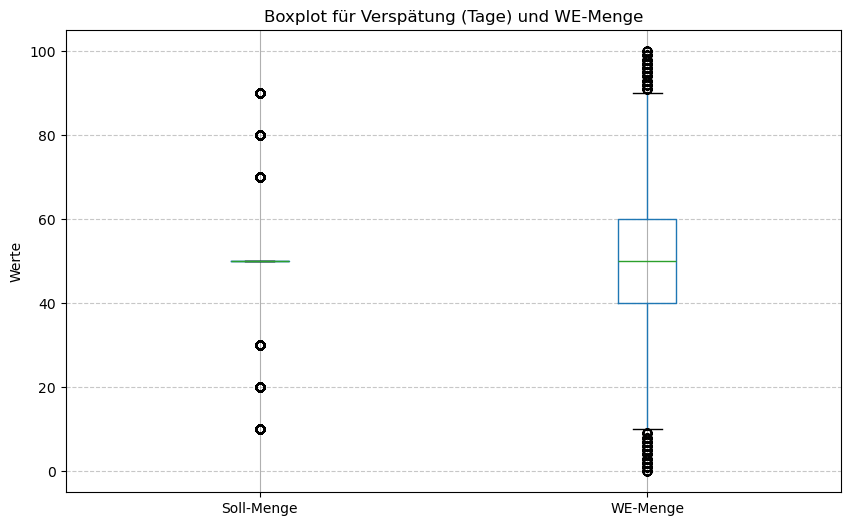

In [20]:
# Erstellen eines Boxplots für "Verspätung (Tage)" und "WE-Menge"

plt.figure(figsize=(10,6))
cleaned_anomalies_liefertreue_2024_df.boxplot(column=["Soll-Menge", "WE-Menge"])
plt.title("Boxplot für Verspätung (Tage) und WE-Menge")
plt.ylabel("Werte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Kurze Interpretation**

1.	Soll-Menge: Die Bestellungen scheinen standardisiert um 50 zu liegen, mit einigen wenigen Abweichungen.
2.	WE-Menge: Hier zeigt sich eine stärkere Abweichung von der Soll-Menge, was auf Probleme in der Liefertreue hindeuten könnte, insbesondere bei niedrigen Mengenwerten.
3.	Ausreißer: Die vielen niedrigen Ausreißer in der WE-Menge könnten auf unvollständige Lieferungen oder Fehler in der Lieferkette hinweisen.

### Exploratory data analysis

In [21]:
# Datenprofil für den Liefertreue-Datensatz

data_profile = {
    "Spalte": liefertreue_sc_df.columns,
    "Datentyp": liefertreue_sc_df.dtypes.values,
    "Eindeutige Werte": liefertreue_sc_df.nunique().values,
    "Fehlende Werte": liefertreue_sc_df.isnull().sum().values,
    "Nicht-Leere Werte": liefertreue_sc_df.notnull().sum().values,
}

profile_df = pd.DataFrame(data_profile)

print('Datenprofil für den Liefertreue-Datensatz')
# Profiling anzeigen
profile_df.head(12)

Datenprofil für den Liefertreue-Datensatz


,Spalte,Datentyp,Eindeutige Werte,Fehlende Werte,Nicht-Leere Werte
0,Lieferscheinnummer,object,9992,0,10000
1,Lieferantennummer,object,10,0,10000
2,Lieferantenbezeichnung,object,5,0,10000
3,Materialnummer,object,60,0,10000
4,Materialbezeichnung,object,10,0,10000
5,Land,object,7,0,10000
6,Bestelldatum,datetime64[ns],331,0,10000
7,Lieferdatum (Soll),datetime64[ns],345,0,10000
8,Wareneingangsdatum (WE),datetime64[ns],352,0,10000
9,Soll-Menge,int64,7,0,10000


In [22]:
print(f"Form des Datensatzes: {liefertreue_sc_df.shape}")
print(liefertreue_sc_df.info())

Form des Datensatzes: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Lieferscheinnummer       10000 non-null  object        
 1   Lieferantennummer        10000 non-null  object        
 2   Lieferantenbezeichnung   10000 non-null  object        
 3   Materialnummer           10000 non-null  object        
 4   Materialbezeichnung      10000 non-null  object        
 5   Land                     10000 non-null  object        
 6   Bestelldatum             10000 non-null  datetime64[ns]
 7   Lieferdatum (Soll)       10000 non-null  datetime64[ns]
 8   Wareneingangsdatum (WE)  10000 non-null  datetime64[ns]
 9   Soll-Menge               10000 non-null  int64         
 10  WE-Menge                 10000 non-null  int64         
 11  Verspätung (Tage)        10000 non-null  int64         
 12 

**Boxplot Durchschnitt Verspätung (Tage) nach Land**

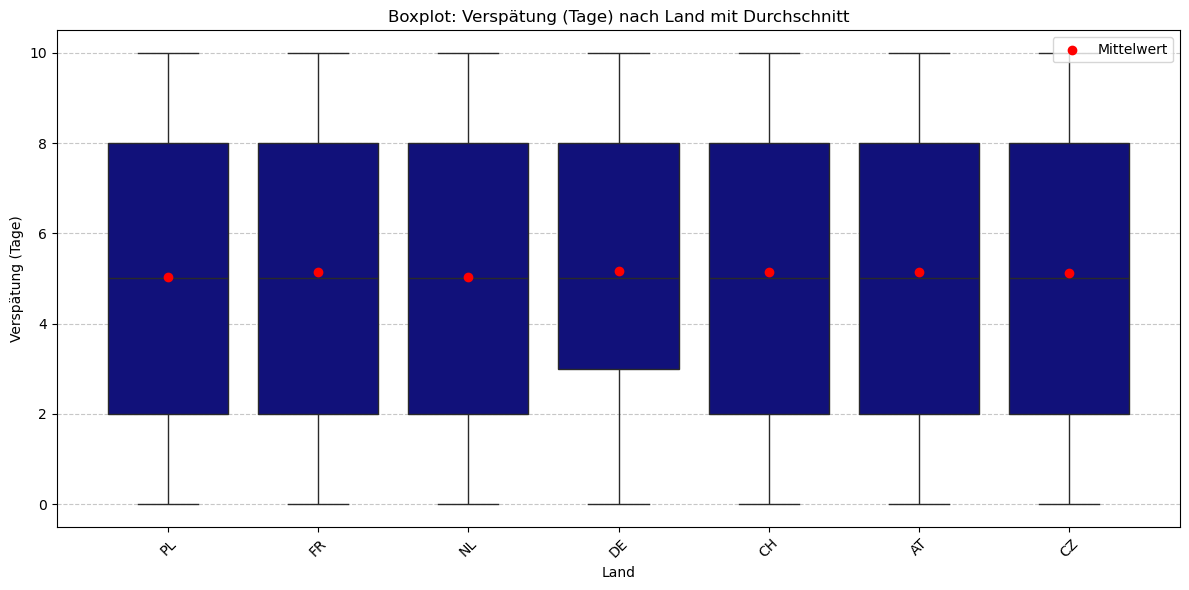

In [23]:
# Durchschnittliche Verspätung nach Land berechnen
mean_delay_by_land = liefertreue_sc_df.groupby("Land")["Verspätung (Tage)"].mean().reset_index()

# Boxplot + Durchschnittswerte hinzufügen
plt.figure(figsize=(12, 6))
sns.boxplot(data=liefertreue_sc_df, x="Land", y="Verspätung (Tage)", color="darkblue")
plt.scatter(mean_delay_by_land["Land"], mean_delay_by_land["Verspätung (Tage)"], color="red", label="Mittelwert", zorder=5)
plt.title("Boxplot: Verspätung (Tage) nach Land mit Durchschnitt")
plt.xlabel("Land")
plt.ylabel("Verspätung (Tage)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Verteilung Anzahl Lieferungen nach Termintreue**

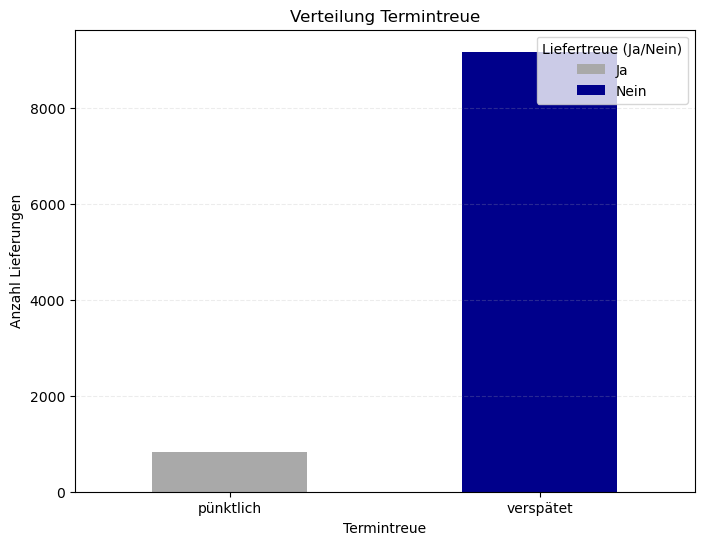

In [24]:
# Crosstab erstellen
cross_tab = pd.crosstab(liefertreue_sc_df["Termintreue"], liefertreue_sc_df["Liefertreue (Ja/Nein)"])

# Plotten der Crosstab-Daten
cross_tab.plot(kind="bar", stacked=True, figsize=(8, 6), color=["darkgrey", "darkblue"])
plt.title("Verteilung Termintreue")
plt.xlabel("Termintreue")
plt.ylabel("Anzahl Lieferungen")
plt.xticks(rotation=0)
plt.legend(title="Liefertreue (Ja/Nein)", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.23)
plt.show()

**Berechnung der durchschnittlichen Verspätung pro Monat**

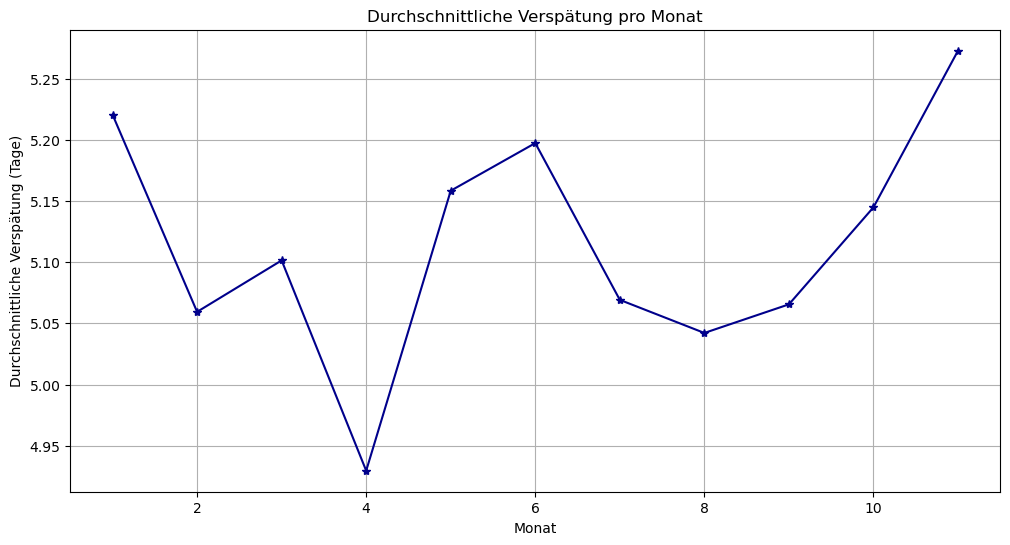

In [25]:
# Berechnung der durchschnittlichen Verspätung pro Monat

liefertreue_sc_df["Bestellmonat"] = liefertreue_sc_df["Bestelldatum"].dt.month

monthly_summary = liefertreue_sc_df.groupby("Bestellmonat")["Verspätung (Tage)"].mean()
monthly_summary.plot(kind="line", marker="*", figsize=(12, 6), color="darkblue")
plt.title("Durchschnittliche Verspätung pro Monat")
plt.xlabel("Monat")
plt.ylabel("Durchschnittliche Verspätung (Tage)")
plt.grid()
plt.show()

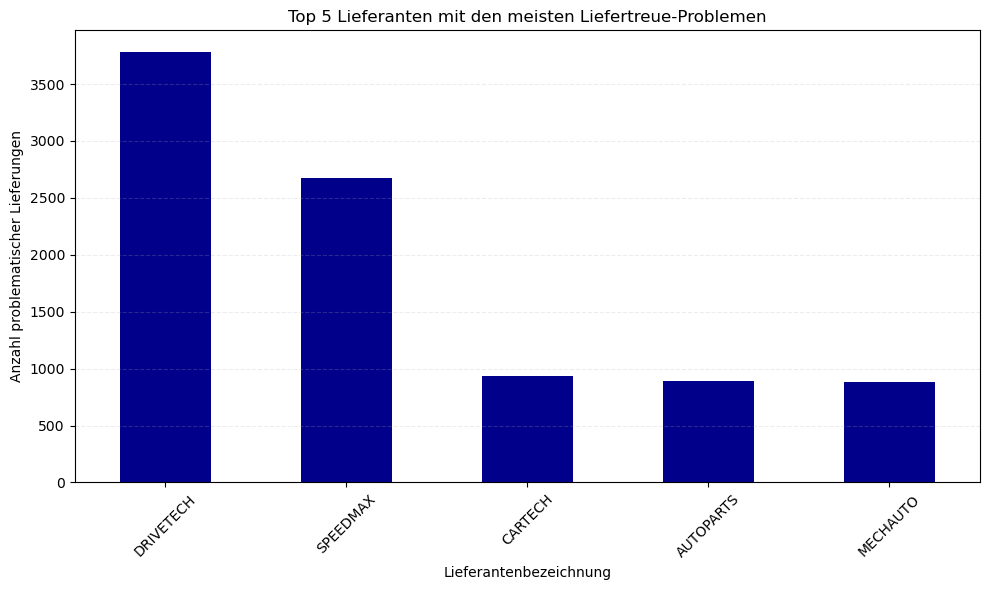

In [26]:
# Top 5 Lieferanten mit den meisten Liefertreue-Problemen

# Berechnung der Anzahl "Nein" (schlechte Liefertreue) pro Lieferant
problematic_deliveries_by_supplier = liefertreue_sc_df[
    liefertreue_sc_df["Liefertreue (Ja/Nein)"] == "Nein"
].groupby("Lieferantenbezeichnung").size()

# Top 5 Lieferanten mit den meisten problematischen Lieferungen
top_5_suppliers = problematic_deliveries_by_supplier.sort_values(ascending=False).head(5)

# Balkendiagramm erstellen
top_5_suppliers.plot(kind="bar", figsize=(10, 6), color="darkblue")
plt.title("Top 5 Lieferanten mit den meisten Liefertreue-Problemen")
plt.xlabel("Lieferantenbezeichnung")
plt.ylabel("Anzahl problematischer Lieferungen")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.23)
plt.tight_layout()
plt.show()

**Barchat: Analyse Anzahl lieferanten nach Liuefertreue Status und Land**

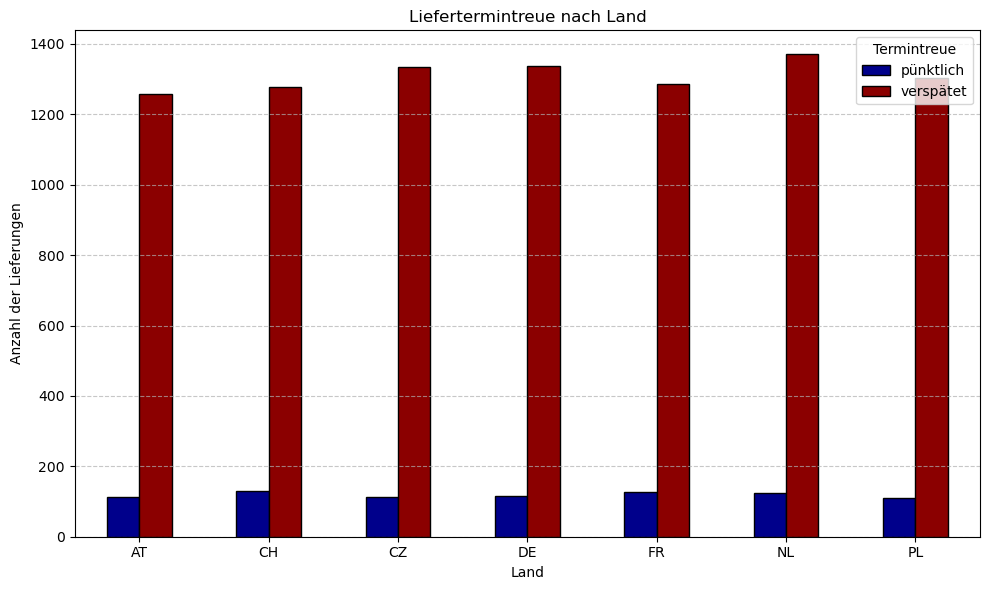

In [27]:
# Analyse Kategorische Daten und Länder

# Berechnung der Anzahl von Liefertreue ("Ja" und "Nein") nach Land
delivery_accuracy_by_country = liefertreue_sc_df.groupby(["Land", "Termintreue"]).size().unstack()

# Balkendiagramm erstellen mit guter und schlechter Liefertreue
delivery_accuracy_by_country.plot(kind="bar", figsize=(10, 6), stacked=False, color=["darkblue", "darkred"], edgecolor="black")

# Diagrammtitel und Achsentitel
plt.title("Liefertermintreue nach Land")
plt.xlabel("Land")
plt.ylabel("Anzahl der Lieferungen")
plt.xticks(rotation=-0)
plt.legend(title="Termintreue")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Analyse der Datenverteilung - Histogramm**

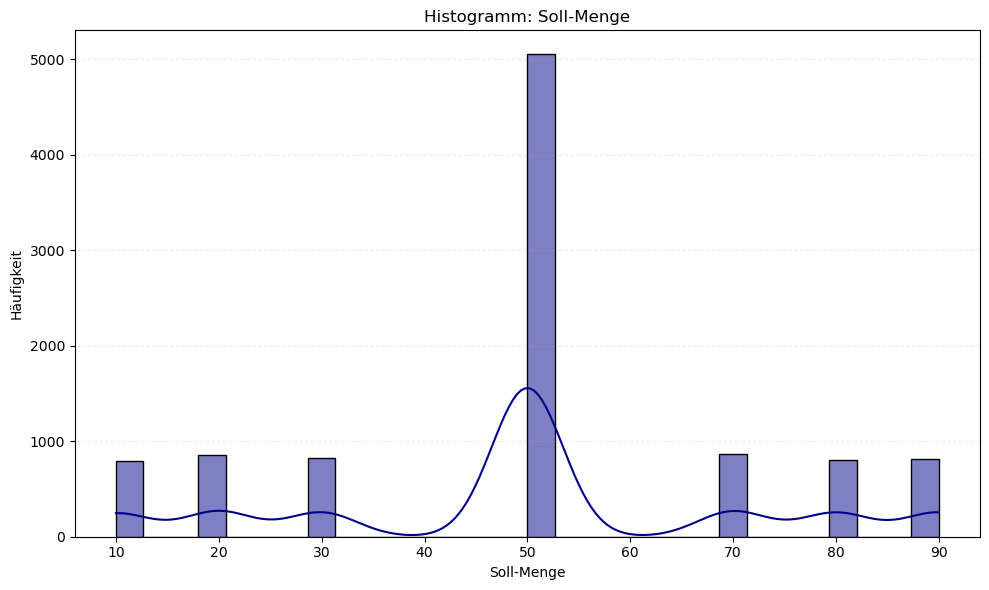

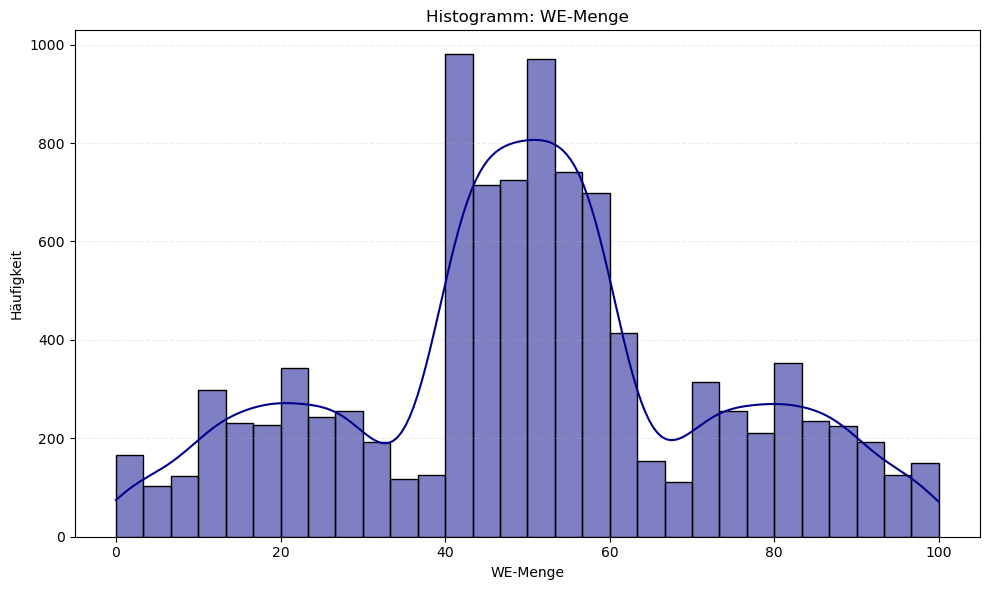

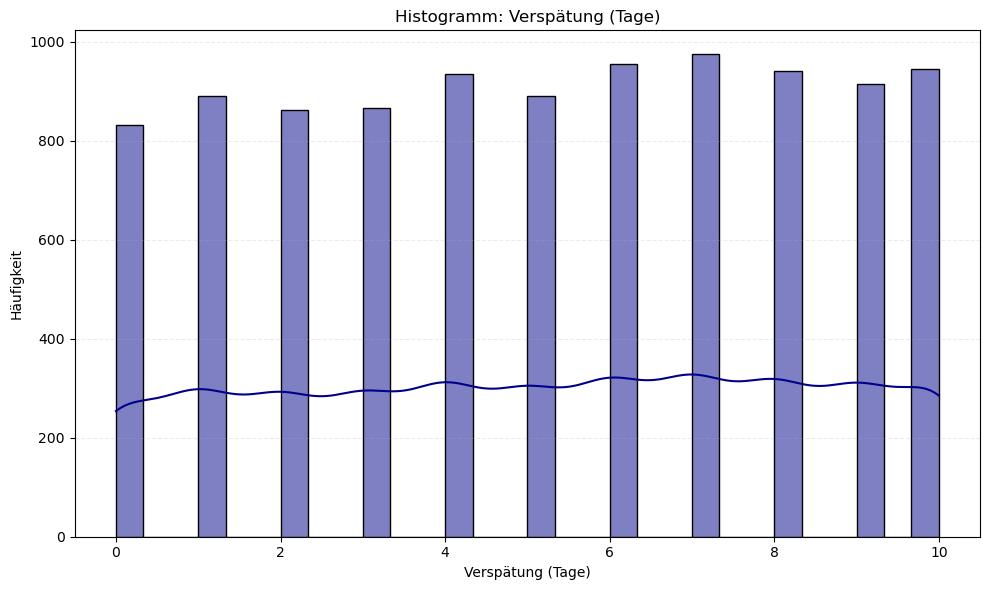

In [28]:
# Liste der numerischen Spalten zur Untersuchung
numerical_columns = ["Soll-Menge", "WE-Menge", "Verspätung (Tage)"]

# Histogrammen für jede numerische Spalte erstellen
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(liefertreue_sc_df[column], kde=True, bins=30, edgecolor="black", color='darkblue')
    plt.title(f"Histogramm: {column}")
    plt.xlabel(column)
    plt.ylabel("Häufigkeit")
    plt.grid(axis="y", linestyle="--", alpha=0.23)
    plt.tight_layout()
    plt.show()

### Relationships

Zusammenhänge zwischen Variable untersuchen, wie ob Korrelationen, Muster oder Abhängikeiten vorhanden sind

In [29]:
liefertreue_sc_df.head()

,Lieferscheinnummer,Lieferantennummer,Lieferantenbezeichnung,Materialnummer,Materialbezeichnung,Land,Bestelldatum,Lieferdatum (Soll),Wareneingangsdatum (WE),Soll-Menge,WE-Menge,Verspätung (Tage),Liefertreue (Ja/Nein),Termintreue,Bestellmonat
0,LS4779614,L6992897,SPEEDMAX,A76048637,MOTORÖL,PL,2024-04-26,2024-05-07,2024-05-09,50,60,2,Nein,verspätet,4
1,LS8229008,L4779652,DRIVETECH,A68229157,AUSPUFF,FR,2024-08-11,2024-08-15,2024-08-19,90,88,4,Nein,verspätet,8
2,LS5246201,L2694595,DRIVETECH,A56357430,RADLAGER,NL,2024-11-16,2024-11-25,2024-12-01,80,84,6,Nein,verspätet,11
3,LS6912572,L7484102,CARTECH,A50267673,REIFEN,DE,2024-07-19,2024-07-29,2024-07-31,50,47,2,Nein,verspätet,7
4,LS3628356,L9018262,SPEEDMAX,A96656849,RADLAGER,FR,2024-06-29,2024-07-10,2024-07-18,90,93,8,Nein,verspätet,6


**Heatmap der Korrelationen - Int-Werte**

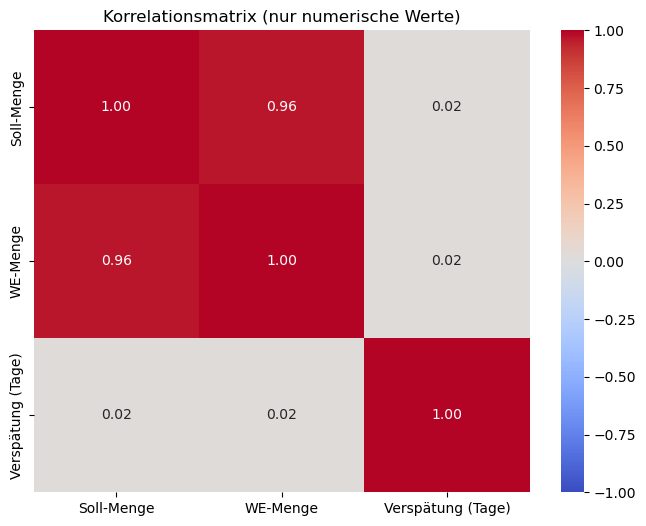

In [30]:
# Heatmap der Korrelationen (Analysieren ob negative oder positoive Korrelationen vorhanden sind, zwischen den numerischen Spalten)

# Auswahl nur der numerischen Spalten
numerical_df = liefertreue_sc_df.select_dtypes(include=["float64", "int64"])

# Korrelationsmatrix berechnen
correlation_matrix = numerical_df.corr()

# Heatmap der Korrelationen erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Korrelationsmatrix (nur numerische Werte)")
plt.show()

**Heatmap der Korrelationen - Interpretation**

| **Erkenntnis**                        | **Kurze Beschreibung**                                                                 |
|---------------------------------------|-----------------------------------------------------------------------------|
| **1. Soll-Menge und WE-Menge**        | - Zeigen einen **sehr starken linearen Zusammenhang** (0.96).               |
|                                       | - Die gelieferte Menge ist nahe an der bestellten Menge.                    |
| **2. Verspätung (Tage)**              | - Hat **keinen Zusammenhang** mit der Soll-Menge oder WE-Menge (beide 0.02).|
|                                       | - Die Ursachen für Lieferverzögerungen sind unabhängig von der Bestellmenge.|
|                                       | - Ebenso unabhängig von der gelieferten Menge.                              |

<Figure size 1000x600 with 0 Axes>

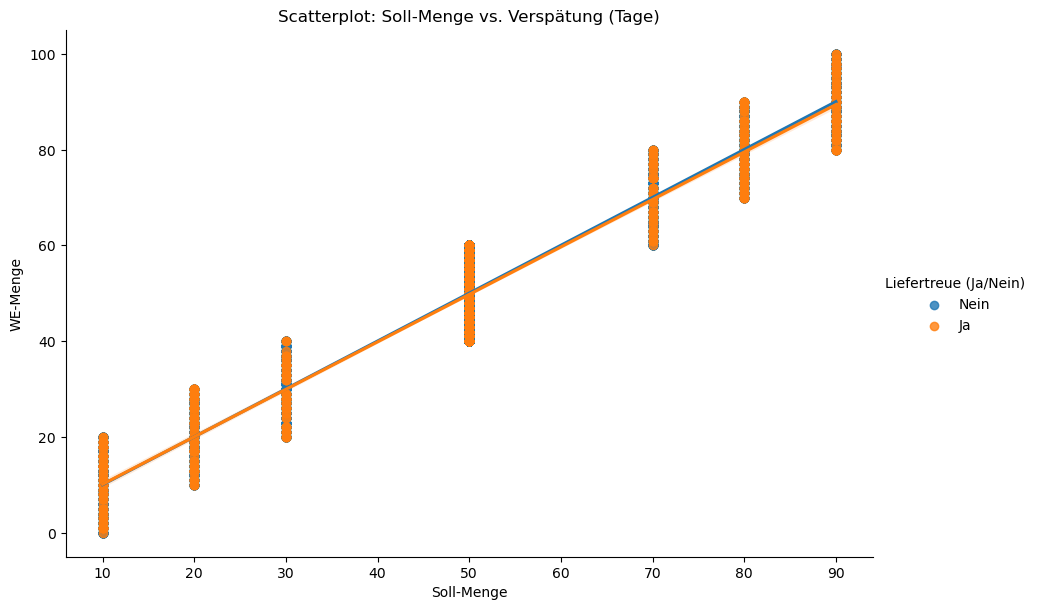

In [31]:
# Scatterplot mit Regressionslinie

plt.figure(figsize=(10, 6))
sns.lmplot(data=liefertreue_sc_df, x="Soll-Menge", y="WE-Menge", hue="Liefertreue (Ja/Nein)", height=6, aspect=1.5)
plt.title("Scatterplot: Soll-Menge vs. Verspätung (Tage)")
plt.show()

**Scatterplot:**
Die Punkte sind entlang einer geraden Linie verteilt, was auf einen starken positiven linearen Zusammenhang zwischen Soll-Menge und WE-Menge (tatsächlich gelieferte Menge) hinweist.

/var/folders/zt/5jf7tm811cq61n__pzgf61l80000gn/T/ipykernel_94705/1348104637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=liefertreue_sc_df, x="Land", y="Verspätung (Tage)", palette="Set2", hue=None)


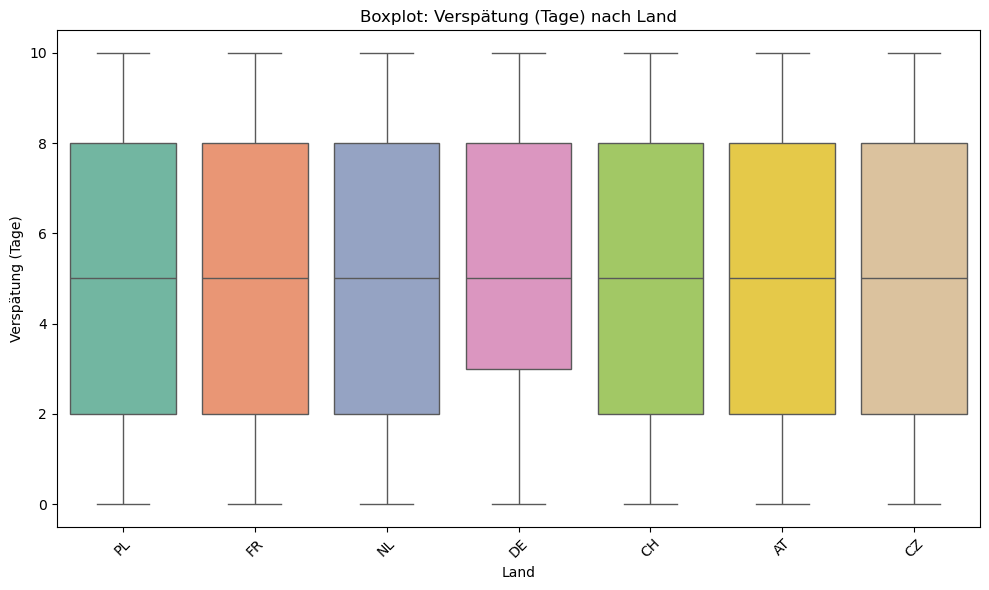

In [32]:
# Boxplot für Verspätung (Tage) nach Land
plt.figure(figsize=(10, 6))
sns.boxplot(data=liefertreue_sc_df, x="Land", y="Verspätung (Tage)", palette="Set2", hue=None)
plt.title("Boxplot: Verspätung (Tage) nach Land")
plt.xlabel("Land")
plt.ylabel("Verspätung (Tage)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Boxplot:** Der Boxplot ergibt wenig Sinn.

## Model

### Select model

Für erste würde ich mich eine Logistische regression entscheiden, da das Model sich für linieare Beziehungen gut einigt und Zielvariable Liefertreue binär ist (Ja/Nein). 

### Training and validation

In [33]:
# Features und Zielvariable aus Trainings- und Testdaten extrahieren

X_train = train_data_df[["Soll-Menge", "WE-Menge", "Verspätung (Tage)"]]  
y_train = train_data_df["Liefertreue (Ja/Nein)"].map({"Ja": 1, "Nein": 0})  

X_test = test_data_df[["Soll-Menge", "WE-Menge", "Verspätung (Tage)"]]  
y_test = test_data_df["Liefertreue (Ja/Nein)"].map({"Ja": 1, "Nein": 0})  

print("Features und Zielvariable aus Trainings- und Testdaten erfolgreich extrahiert.")

Features und Zielvariable aus Trainings- und Testdaten erfolgreich extrahiert.


### Fit model

In [34]:
# Verwendung von Trainingsdaten (train_data_df) für das Modelltraining

from sklearn.linear_model import LogisticRegression

# Modell initialisieren und trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

print("Logistisches Regressionsmodell wurde erfolgreich trainiert.")
model


Logistisches Regressionsmodell wurde erfolgreich trainiert.


LogisticRegression()

### Evaluation on test set

In [35]:
# Die Testdaten (test_data_df) werden für die Vorhersage und Bewertung verwendet.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Vorhersagen auf Testdaten erstellen
y_pred = model.predict(X_test)

# Bewertung des Modells
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Genauigkeit des Modells: {accuracy:.2f}")
print("\nKonfusionsmatrix:")
print(conf_matrix)
print("\nKlassifikationsbericht:")
print(class_report)


Genauigkeit des Modells: 1.00

Konfusionsmatrix:
[[2748    0]
 [   0  252]]

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2748
           1       1.00      1.00      1.00       252

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

In [36]:
import joblib

# Modell unter models speichern
model_path = "../models/logistische_regression_liefertreue.pkl"

joblib.dump(model, model_path)
print(f"Modell wurde erfolgreich gespeichert unter: {model_path}")

Modell wurde erfolgreich gespeichert unter: ../models/logistische_regression_liefertreue.pkl


## Conclusions

In [37]:
# Analyse der Koeffizienten

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Koeffizient": model.coef_[0]
})

print("Einfluss der Features auf die Liefertreue:")
print(coefficients)

Einfluss der Features auf die Liefertreue:
             Feature  Koeffizient
0         Soll-Menge     0.006043
1           WE-Menge    -0.005419
2  Verspätung (Tage)    -8.476015


**Analyse und Handlungsempfehlung**

| **Feature**          | **Richtung**       | **Einflussstärke** | **Interpretation**                                           | **Gegenmaßnahme**                                                                 |
|-----------------------|--------------------|--------------------|-------------------------------------------------------------|----------------------------------------------------------------------------------|
| **Soll-Menge**        | Positiv            | Sehr gering        | Kaum Einfluss auf die Liefertreue.                          | Keine unmittelbare Maßnahme erforderlich, da der Einfluss vernachlässigbar ist.  |
| **WE-Menge**          | Negativ            | Sehr gering        | Minimal negativer Einfluss auf die Liefertreue.             | Überwachung der Liefermengen und frühzeitige Kommunikation mit Lieferanten.      |
| **Verspätung (Tage)** | Stark negativ      | Sehr hoch          | Hauptfaktor: Eine hohe Verspätung reduziert die Liefertreue drastisch. | Einführung von Qualitätskontrollen oder Bestellungen mit Puffertagen zur Reduzierung von Lieferverspätungen. |

**Weiteres Vorgehen** 

Als nächstes werde ich die Einflüsse weiterer Features auf die Liefertreue analysieren. Dazu werde ich die Daten entsprechend aufbereiten und anschließend die Analyse durchführen. Dabei stehen insbesondere Faktoren wie Lieferanten und Land im Fokus.

**Datenaufbereitung**
- Erstellung geeigneter kategorialer Variablen (z. B. Lieferantenklassifizierung: lokal/international)

**Visualisierung der Zusammenhänge zwischen**
- Lieferanten und Liefertreue (Ja/Nein).
- Ländern und der durchschnittlichen Verspätung.

**Hypothesenprüfung**
Formulierung von Hypothesen, z. B.:

- H1: Bestimmte Lieferanten haben eine signifikant schlechtere Liefertreue.

- H2: Lieferungen aus bestimmten Ländern zeigen höhere Verspätungen.

Dazu: Durchführung von statistischen Tests wie Chi-Quadrat-Test (für kategoriale Features) oder ANOVA (für numerische Unterschiede zwischen Gruppen).

**Deep Dive in Modelle**
- Erweiterung des bestehenden Logistischen Regressionsmodells um zusätzliche Features wie Lieferant und Land.

**Handlungsempfehlung definieren**
- Handlungsempfehlung anhand Datenanalyse 

**Zusammenfassung - 16.12.24**

Das Ziel des nächsten Schritts ist es, weitere Einflussfaktoren auf die Liefertreue zu identifizieren, statistisch zu überprüfen und mithilfe erweiterter Modelle zu validieren. Basierend auf den Ergebnissen werden datenbasierte Handlungsempfehlungen abgeleitet, um die Liefertreue langfristig zu verbessern.

In [38]:
!jupyter nbconvert --to html draft-analysis.ipynb

[NbConvertApp] Converting notebook draft-analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 999763 bytes to draft-analysis.html
